Importando bibliotecas

In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


Carregando dataset


In [2]:
train_df = pd.read_csv('datasets/train.csv')
test_df = pd.read_csv('datasets/test.csv')

data_df = pd.concat([train_df.drop(['Survived'], axis=1), test_df])


Conhecendo algums informações sobre o dataset

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


Com este comando conseguimos visualizar quais são as colunas disponiveis, [PassegerID (Identificação do passageiro), Survived (sobreviveu), Pclass (classe do passageiro), Name (Nome), Sex (Sexo), Age (Idade), SibSp (conjuge no navio), Parch (filhos no navio), Ticket (passagem), Fare (tarifa), Cabin (Cabine), Embarked (embarque)] e a memória utilizada na leitura/processamento do arquivo: (+ ou - 83.6KB)


##### A função "head" exibe as primeiras 5 linhas do quadro de dados.

#### Vamos explorar as colunas:

##### PassengerId - este é apenas um ID gerado 
##### class - qual classe fez o passeio de passageiro - primeiro, segundo ou terceiro
##### Nome - auto explicativo
##### Sexo - masculino ou feminino
##### SibSp - eram o cônjuge ou irmãos do passageiro com eles no navio
##### Partch - eram os pais ou os filhos do passageiro com eles no navio
##### Bilhete - número do bilhete
##### Tarifa - valor da passagem
##### Cabine
##### Embarcado - porto de embarque
##### Sobreviveu - o passageiro sobreviveu ao naufrágio do Titanic?

In [4]:
data_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Conta a quantidade de linhas no dataset

In [5]:
len(data_df)

1309

Verificando correlação excluindo os campos sem valor

In [6]:
data_df.dropna().corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.083025,0.107439,0.031943,-0.033144,0.092916
Pclass,-0.083025,1.000000,-0.338191,-0.115850,0.034030,-0.310019
Age,0.107439,-0.338191,1.000000,-0.076471,-0.158510,0.014322
SibSp,0.031943,-0.115850,-0.076471,1.000000,0.252892,0.268031
Parch,-0.033144,0.034030,-0.158510,0.252892,1.000000,0.390004
Fare,0.092916,-0.310019,0.014322,0.268031,0.390004,1.000000


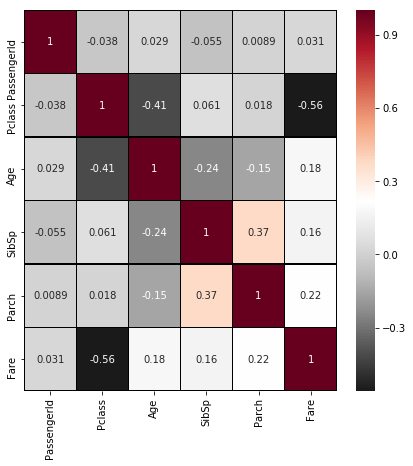

In [7]:
%matplotlib inline

plt.figure(figsize=(7,7))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, linecolor='black', cmap='RdGy_r')
plt.xticks(rotation=90)
plt.show()

In [7]:
data_df.describe(include = "all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


Verificando a quantidade de linhas vazias para cada coluna

In [8]:
data_df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### No nosso dataset temos 891 linhas 


Observei que para a idade temos 177 linhas que nao possuem idade
estou supondo que a idade e importante para a sobrevivencia.
Assim vou preencher a idade de forma a nao deixar vazio.
 
Na coluna cabine temos 687 linhas vazias, presumo que seja um dado irrelavante
uma vez que temos a classe do passageiro.




### Obtendo a media de idade para poder preencher as linhas de idade nulas

In [9]:
mode(data_df['Age']).mode[0]

24.0

#### inputando a media de idade para as linhas vazias

In [10]:
data_df['Age'].fillna(mode(data_df['Age']).mode[0], inplace=True)

In [11]:
#preenchendo valores vazio na tarifa
data_df['Fare'].fillna(data_df['Fare'].mean(), inplace=True)

# Analise de sobrevivente dividido por classes

#### Grafico dos sobreviventes por clase

In [12]:
print("Percentual de sobreviventes: 1 Classe:", data_df["Survived"][data_df["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentual de sobreviventes: 2 Classe:", data_df["Survived"][data_df["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentual de sobreviventes: 3 Classe:", data_df["Survived"][data_df["Pclass"] == 3].value_counts(normalize = True)[1]*100)

KeyError: 'Survived'

In [13]:
sns.barplot(x="Pclass", y="Survived", data=data_df)

ValueError: Could not interpret input 'Survived'

### Vamos deixas as informações mais claras removendo as informações que nao seram uteis nas analises
###### Julgamos que estas variaveis nao serao de grande impacto para nosso modelo
#### Ticket, Cabin e PassegerId



In [16]:
data_df.drop(['Ticket','Cabin','PassengerId'], axis=1, inplace = True)

data_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [17]:
#agora precisamos preencher os valores ausentes no recurso Embarcado
print("Number of people embarking in Southampton (S):")
southampton = data_df[data_df["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = data_df[data_df["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = data_df[data_df["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
914
Number of people embarking in Cherbourg (C):
270
Number of people embarking in Queenstown (Q):
123


##### Como a maioria das pessoas embarcaram no portao de Southampton, vamos preencher os nulos como Southampton

In [18]:
data_df = data_df.fillna({"Embarked": "S"})


In [19]:
data_df.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

##### Precisamos que as variaveis Sex e Embarked sejam numericas, assim vamos deixar elas binarias

In [20]:
data_df = pd.get_dummies(data_df, dummy_na=True, columns=['Sex','Embarked'])


In [21]:
display(data_df.head())

,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Sex_nan,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,1,0,0,0,1,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,0,0,1,0,0,0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,0,0,0,0,1,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,0,0,0,0,1,0
4,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,1,0,0,0,1,0


#### Removendo Colunas Vazias

In [22]:
data_df.drop(['Sex_nan','Embarked_nan'], axis=1, inplace = True)

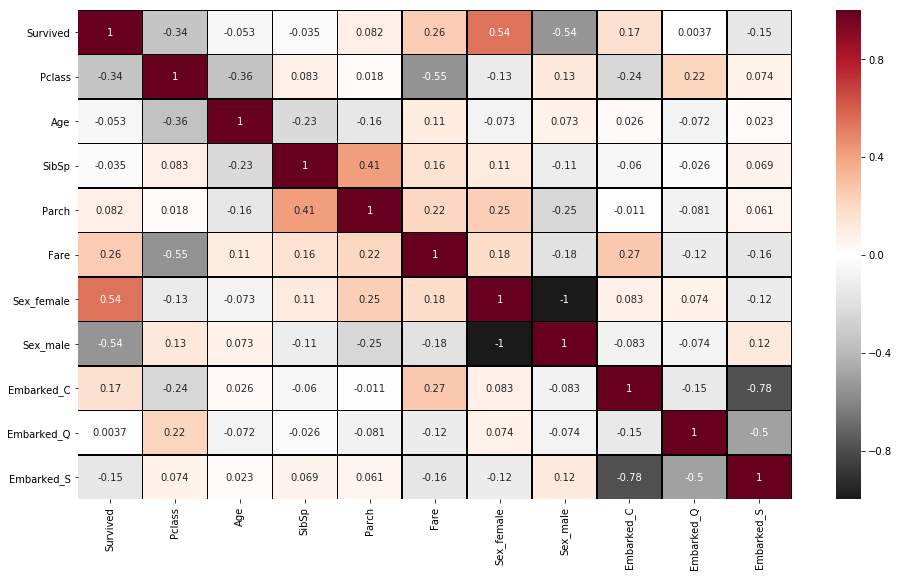

In [24]:
%matplotlib inline

plt.figure(figsize=(16,9))
sns.heatmap(train.corr(), annot=True, linewidths=0.5, linecolor='black', cmap='RdGy_r')
plt.xticks(rotation=90)
plt.show()

In [23]:
#Agrupando a proporção de sobrevivente por classe e gerando um gráfico a partir do resultado

sobreviventes_classe = data_df.copy()
sobreviventes_classe['Survived'] = data_df['Survived'] == 1

sns.barplot(data_df=sobreviventes_classe, x="Pclass", y="Survived")

plt.title('Proporção de Sobreviventes por classe')
plt.ylabel('Proporção')
plt.show()

KeyError: 'Survived'

In [24]:
sns.barplot(x="Sex_female", y ="Survived", data=data_df)


ValueError: Could not interpret input 'Survived'

In [28]:
for name_string in data_df['Name']:
    data_df['Title']=data_df['Name'].str.extract('([A-Za-z]+)\.',expand=True)
    
    

#Substituindo os titulos pelos mais comuns.
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
data_df.replace({'Title': mapping}, inplace=True)

data_df['Title'].value_counts()

Mr        767
Miss      265
Mrs       200
Master     61
Rev         8
Dr          8
Name: Title, dtype: int64

In [30]:
data_df.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title
0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,1,0,0,1,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,0,1,0,0,Mrs
2,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,0,0,0,1,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,0,0,0,1,Mrs
4,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,1,0,0,1,Mr


In [27]:
#Definie a variavel objetivo
#target = ['Survived']

In [28]:
#armazenando a variavel de destino
#survived_train = train.Survived

In [31]:
#concatenando as bases de train e test
data = pd.concat([train_df.drop(['Survived'], axis=1), test])


In [ ]:
data.info()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['target'], random_state = 0)
print(X_train.shape)
print(X_test.shape)